# Regression analysis of Time Cost Relations in Transportation Projects of Texas

In [129]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.5/9.9 MB 5.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/9.9 MB 8.8 MB/s eta 0:00:01
   ------- -------------------------------- 1.9/9.9 MB 11.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/9.9 MB 12.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.8/9.9 MB 13.6 MB/s eta 0:00:01
   ------------------- -------------------- 4.8/9.9 MB 14.6 MB/s eta 0:00:01
   ------------------------ --------------- 5.9/9.9 MB 15.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.2/9.9 MB 16.9 MB/s eta 0:00:01
   ------------------------------- -------- 7.8/9.9 MB 16.7 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 18.0 MB/s eta 0:00:01
   -------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Cost Data

In [24]:
# Import data file

data = pd.read_excel('E:/CTR1/Data Sheet/Time-Cost Data (Practice).xlsx', sheet_name = 0)

In [25]:
# Pick out useful columns for calculation

cost_data = data[['CCSJ', 'ESTIMATE_NBR', 'ESTIMATE_TYPE','TOTAL_WRK_TO_DT', 'CNNBR1', 'TOT_BID_AMT', 'NET_C_O_AMT', 'T_CONT.TOT_BID_AMT+T_CONT.NET_']]

In [26]:
# Calculation of cost percent completion for original bid price and revised bid price

cost_data['C_PERCENT_1'] = cost_data['TOTAL_WRK_TO_DT'] / cost_data['CNNBR1']
cost_data['C_PERCENT_2'] = cost_data['TOTAL_WRK_TO_DT'] / cost_data['T_CONT.TOT_BID_AMT+T_CONT.NET_']

In [27]:
cost_data.head(10)

,CCSJ,ESTIMATE_NBR,ESTIMATE_TYPE,TOTAL_WRK_TO_DT,CNNBR1,TOT_BID_AMT,NET_C_O_AMT,T_CONT.TOT_BID_AMT+T_CONT.NET_,C_PERCENT_1,C_PERCENT_2
0,0002-07-043,1,PROG,631964.00,5619564.55,5637131.95,153313.23,5790445.18,0.112458,0.109139
1,0002-07-043,2,PROG,1547106.10,5619564.55,5637131.95,153313.23,5790445.18,0.275307,0.267183
2,0002-07-043,3,PROG,2330376.87,5619564.55,5637131.95,153313.23,5790445.18,0.414690,0.402452
3,0002-07-043,4,PROG,3217139.86,5619564.55,5637131.95,153313.23,5790445.18,0.572489,0.555595
4,0002-07-043,5,PROG,3450795.71,5619564.55,5637131.95,153313.23,5790445.18,0.614068,0.595947
5,0002-07-043,6,PROG,3639654.26,5619564.55,5637131.95,153313.23,5790445.18,0.647675,0.628562
6,0002-07-043,7,PROG,3855468.94,5619564.55,5637131.95,153313.23,5790445.18,0.686080,0.665833
7,0002-07-043,8,PROG,4697266.09,5619564.55,5637131.95,153313.23,5790445.18,0.835877,0.811210
8,0002-07-043,9,PROG,5123389.51,5619564.55,5637131.95,153313.23,5790445.18,0.911706,0.884801
9,0002-07-043,10,PROG,5254891.04,5619564.55,5637131.95,153313.23,5790445.18,0.935106,0.907511


In [9]:
# Basic description

cost_data.describe()

,ESTIMATE_NBR,TOTAL_WRK_TO_DT,CNNBR1,TOT_BID_AMT,NET_C_O_AMT,T_CONT.TOT_BID_AMT+T_CONT.NET_,C_PERCENT_1,C_PERCENT_2
count,11429.000000,1.142900e+04,1.142900e+04,1.142900e+04,1.142900e+04,1.142900e+04,11429.000000,11429.000000
mean,14.133432,3.256528e+06,4.765286e+06,4.818317e+06,2.534712e+05,5.071789e+06,0.701298,0.666468
std,12.340042,7.188474e+06,9.298704e+06,9.340995e+06,7.576270e+05,9.747511e+06,0.348250,0.328774
min,1.000000,0.000000e+00,2.021410e+05,2.029311e+05,-4.275637e+05,1.990140e+05,0.000000,0.000000
25%,5.000000,4.189315e+05,7.505019e+05,7.628033e+05,0.000000e+00,7.639318e+05,0.425881,0.406132
50%,11.000000,9.465994e+05,1.477750e+06,1.492448e+06,1.492686e+04,1.516816e+06,0.827606,0.792248
75%,19.000000,2.363556e+06,3.488667e+06,3.608303e+06,1.169033e+05,3.864055e+06,0.986033,0.955807
max,88.000000,6.049772e+07,5.887795e+07,5.887795e+07,5.863295e+06,6.021013e+07,1.496747,1.362318


In [10]:
cost_data.to_excel('cost_data.xlsx', index = False)

## Estimate Numbers

In [7]:
# Calculate the number of different ESTIMATE_NBR for each CCSJ
estimate_nbr_count = data.groupby('CCSJ')['ESTIMATE_NBR'].nunique().reset_index()

# Rename columns for clarity
estimate_nbr_count.columns = ['CCSJ', 'Unique_ESTIMATE_NBR_Count']

# Display the result
estimate_nbr_count.head()

,CCSJ,Unique_ESTIMATE_NBR_Count
0,0002-07-043,20
1,0002-07-049,29
2,0002-14-042,9
3,0004-07-122,24
4,0006-06-099,21


In [8]:
estimate_nbr_count.describe()

,Unique_ESTIMATE_NBR_Count
count,578.000000
mean,19.773356
std,12.183128
min,4.000000
25%,12.000000
50%,16.000000
75%,25.000000
max,88.000000


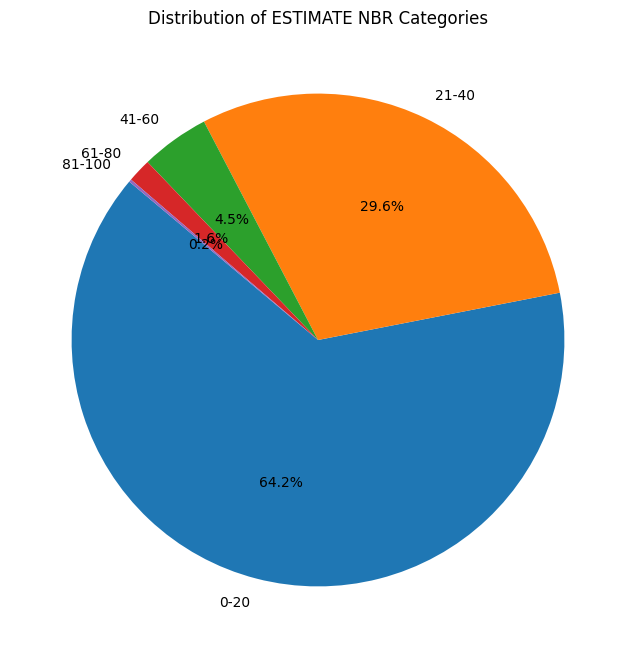

In [38]:
# Define bins for categorizing the Unique_ESTIMATE_NBR_Count
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Categorize the data into bins
estimate_nbr_count['ESTIMATE_NBR_Category'] = pd.cut(estimate_nbr_count['Unique_ESTIMATE_NBR_Count'], bins=bins, labels=labels, right=True)

# Count the number of CCSJ in each category
category_distribution = estimate_nbr_count['ESTIMATE_NBR_Category'].value_counts().sort_index()

# Plot the pie chart for the distribution
plt.figure(figsize=(8, 8))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of ESTIMATE NBR Categories')
plt.show()

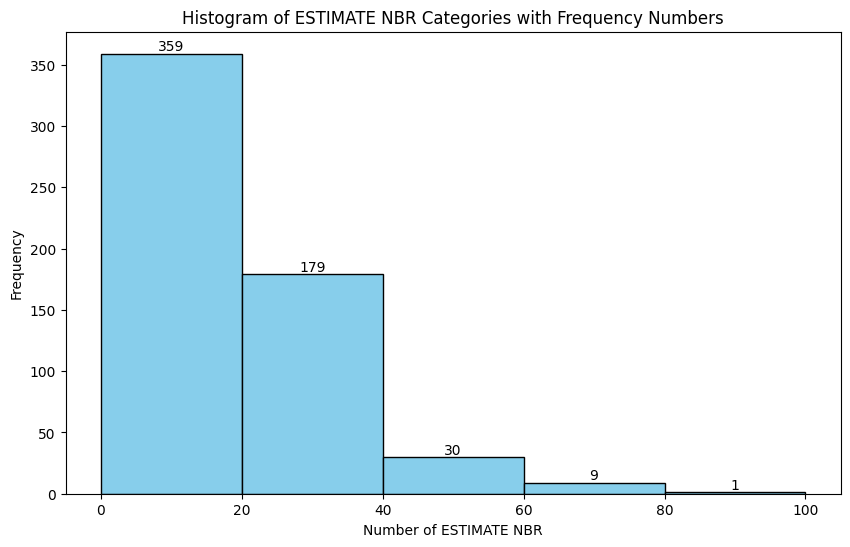

In [39]:
# Plot a histogram for the distribution of ESTIMATE NBR categories

# Plot a histogram for the distribution of ESTIMATE NBR categories with frequency numbers
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(estimate_nbr_count['Unique_ESTIMATE_NBR_Count'], bins=bins, color='skyblue', edgecolor='black')

# Add frequency numbers on each bin
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count), 
             ha='center', va='bottom')

plt.title('Histogram of ESTIMATE NBR Categories with Frequency Numbers')
plt.xlabel('Number of ESTIMATE NBR')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.show()

## Original Bid Prices and Revised Bid Prices

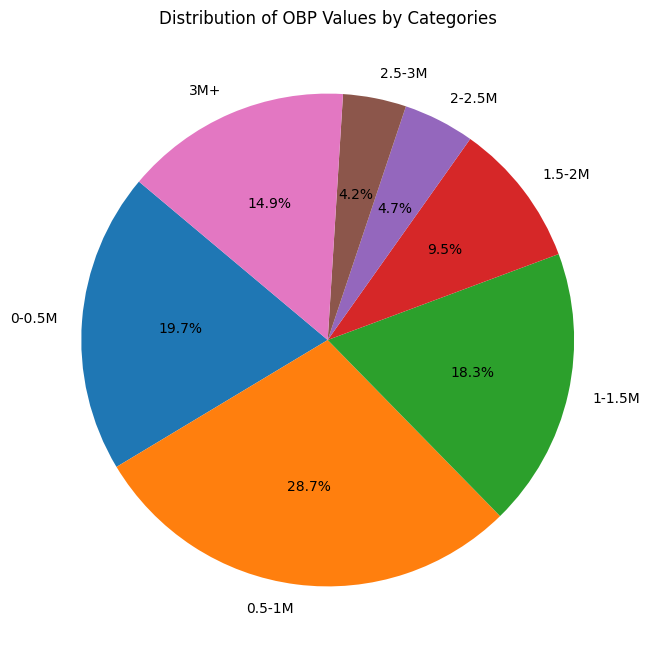

In [34]:
# Group by CCSJ and get the first value of CNNBR1 for each CCSJ
OBP = data.groupby('CCSJ')['CNNBR1'].first().reset_index()

# Define bins for categorizing the CNNBR1 values
cnnbr1_bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, float('inf')]
cnnbr1_labels = ['0-0.5M', '0.5-1M', '1-1.5M','1.5-2M', '2-2.5M', '2.5-3M', '3M+']

# Categorize the CNNBR1 values into bins
OBP['CNNBR1_Category'] = pd.cut(OBP['CNNBR1'], bins=cnnbr1_bins, labels=cnnbr1_labels, right=False)

# Count the number of CCSJ in each category
cnnbr1_distribution = OBP['CNNBR1_Category'].value_counts().sort_index()

# Plot the pie chart for the distribution of CNNBR1 values
plt.figure(figsize=(10, 8))
plt.pie(cnnbr1_distribution, labels=cnnbr1_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of OBP Values by Categories')
plt.show()

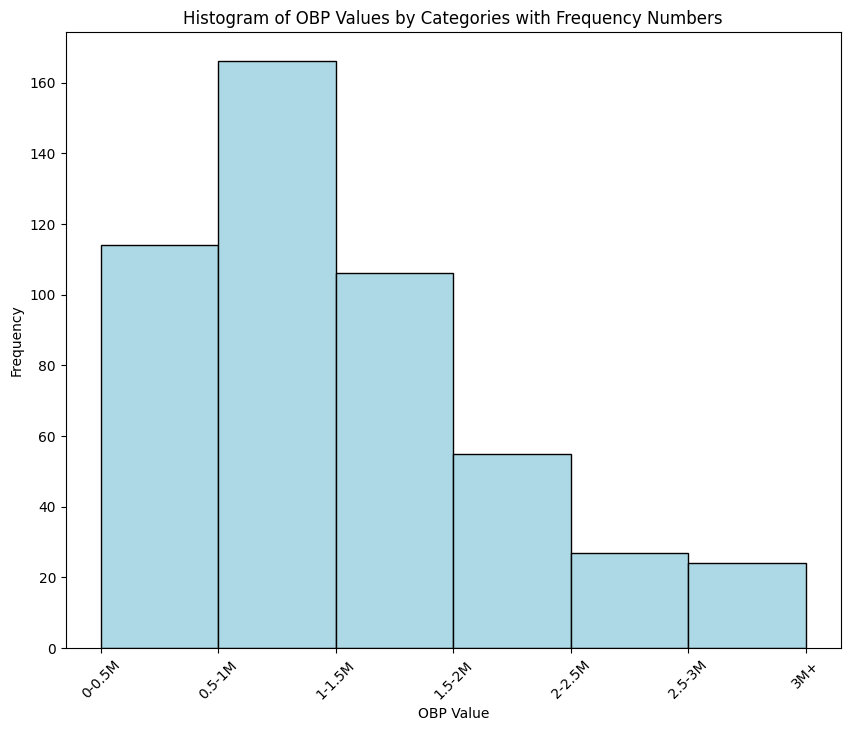

In [35]:
# Draw the histogram 

plt.figure(figsize=(10, 8))
counts, bins, patches = plt.hist(OBP['CNNBR1'], bins=cnnbr1_bins, color='lightblue', edgecolor='black')


plt.title('Histogram of OBP Values by Categories with Frequency Numbers')
plt.xlabel('OBP Value')
plt.ylabel('Frequency')
plt.xticks(cnnbr1_bins[:-1], labels=cnnbr1_labels, rotation=45)  # Exclude the last bin for correct labeling
plt.show()

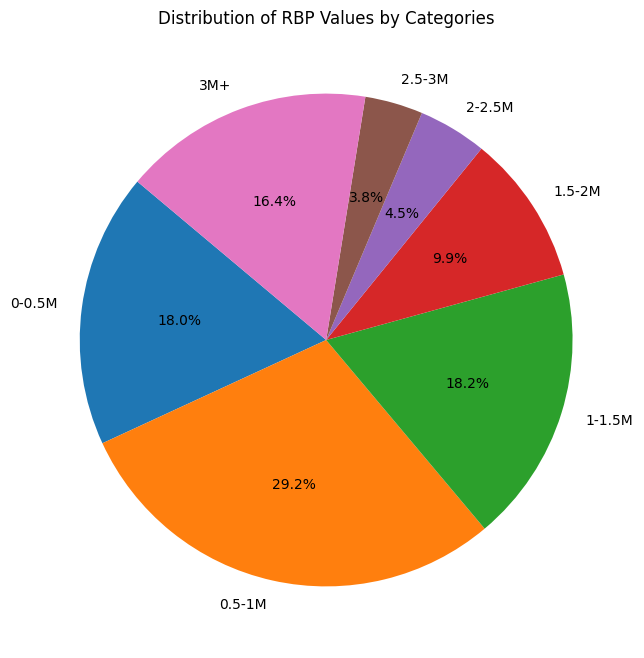

In [37]:
# Group by CCSJ and get the first value of T_CONT.TOT_BID_AMT+T_CONT.NET_ for each CCSJ
RBP = data.groupby('CCSJ')['T_CONT.TOT_BID_AMT+T_CONT.NET_'].first().reset_index()

# Define bins for categorizing the T_CONT.TOT_BID_AMT+T_CONT.NET_ values
rbp_bins = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, float('inf')]
rbp_labels = ['0-0.5M', '0.5-1M', '1-1.5M','1.5-2M', '2-2.5M', '2.5-3M', '3M+']

# Categorize the T_CONT.TOT_BID_AMT+T_CONT.NET_ values into bins
RBP['RBP_Category'] = pd.cut(RBP['T_CONT.TOT_BID_AMT+T_CONT.NET_'], bins=rbp_bins, labels=rbp_labels, right=True)

# Count the number of CCSJ in each category
rbp_distribution = RBP['RBP_Category'].value_counts().sort_index()

# Plot the pie chart for the distribution of OBP values
plt.figure(figsize=(10, 8))
plt.pie(rbp_distribution, labels=rbp_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of RBP Values by Categories')
plt.show()

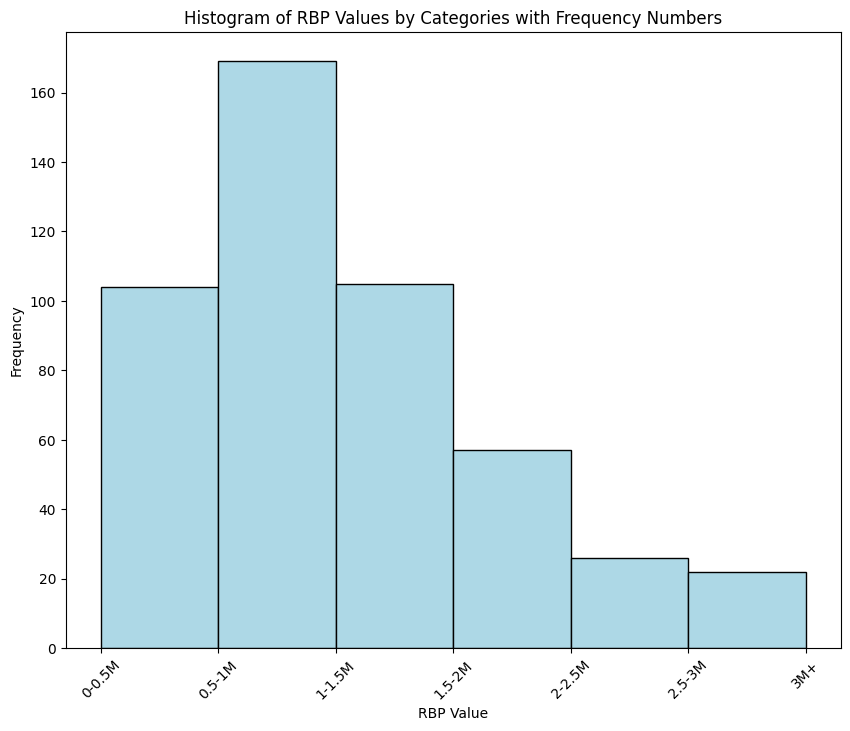

In [38]:
# Draw the histogram 

plt.figure(figsize=(10, 8))
counts, bins, patches = plt.hist(RBP['T_CONT.TOT_BID_AMT+T_CONT.NET_'], bins=rbp_bins, color='lightblue', edgecolor='black')

plt.title('Histogram of RBP Values by Categories with Frequency Numbers')
plt.xlabel('RBP Value')
plt.ylabel('Frequency')
plt.xticks(rbp_bins[:-1], labels=rbp_labels, rotation=45)  # Exclude the last bin for correct labeling
plt.show()

## Cost Progression Analysis

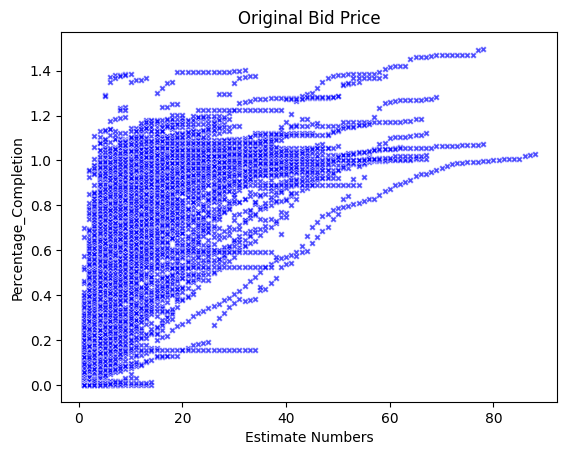

In [15]:
# General scatterplot of PERCENT complete in OBP

sns.scatterplot(x='ESTIMATE_NBR', y='C_PERCENT_1', data = cost_data,  color='blue', s=20, alpha=0.7, marker='X')
plt.xlabel('Estimate Numbers')
plt.ylabel('Percentage_Completion')
plt.title('Original Bid Price')
plt.show()

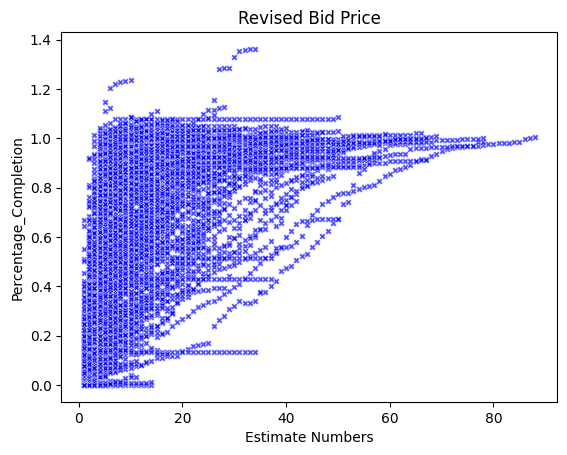

In [16]:
# General scatterplot of PERCENT complete in RBP

sns.scatterplot(x='ESTIMATE_NBR', y='C_PERCENT_2', data = cost_data,  color='blue', s=20, alpha=0.7, marker='X')
plt.xlabel('Estimate Numbers')
plt.ylabel('Percentage_Completion')
plt.title('Revised Bid Price')
plt.show()

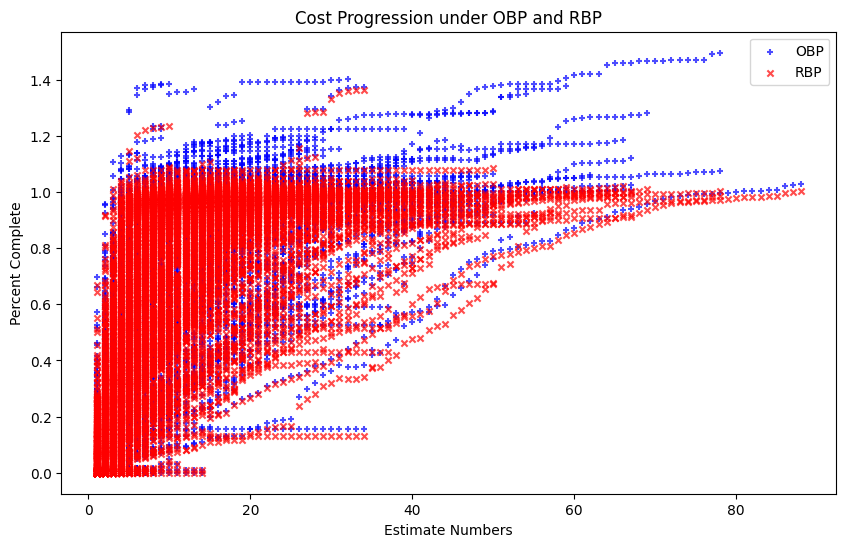

In [64]:
# Combine in one 

plt.figure(figsize=(10, 6))

plt.scatter(cost_data['ESTIMATE_NBR'], cost_data['C_PERCENT_1'], label='OBP', color='blue', marker = '+', s = 20, alpha = 0.7)
plt.scatter(cost_data['ESTIMATE_NBR'], cost_data['C_PERCENT_2'], label='RBP', color='red', marker = 'x', s = 20, alpha = 0.7)

plt.title('Cost Progression under OBP and RBP')
plt.xlabel('Estimate Numbers')
plt.ylabel('Percent Complete')
plt.legend()

plt.show()

## By Estimate Numbers

In [42]:
# Separate large dataframe into different groups by different numbers of EST numbers

# Adjust the bin range to match the correct number of labels
bins_corrected = [0, 20, 40, 60, 80, 100]
labels_corrected = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Categorize each CCSJ based on the number of unique ESTIMATE_NBR
estimate_nbr_count['ESTIMATE_NBR_Category'] = pd.cut(estimate_nbr_count['Unique_ESTIMATE_NBR_Count'], bins=bins_corrected, labels=labels_corrected, right=True)

# Merge this categorized data with the original dataset to filter rows based on the categorized ranges
categorized_data = pd.merge(cost_data, estimate_nbr_count[['CCSJ', 'ESTIMATE_NBR_Category']], on='CCSJ', how='left')

# Separate dataframes for each category
dataframes_by_category = {}
for category in labels_corrected:
    category_df = categorized_data[categorized_data['ESTIMATE_NBR_Category'] == category]
    dataframes_by_category[category] = category_df

In [56]:
dataframes_by_category['0-20'].head(10)

,CCSJ,ESTIMATE_NBR,ESTIMATE_TYPE,TOTAL_WRK_TO_DT,CNNBR1,TOT_BID_AMT,NET_C_O_AMT,T_CONT.TOT_BID_AMT+T_CONT.NET_,C_PERCENT_1,C_PERCENT_2,ESTIMATE_NBR_Category
0,0002-07-043,1,PROG,631964.00,5619564.55,5637131.95,153313.23,5790445.18,0.112458,0.109139,0-20
1,0002-07-043,2,PROG,1547106.10,5619564.55,5637131.95,153313.23,5790445.18,0.275307,0.267183,0-20
2,0002-07-043,3,PROG,2330376.87,5619564.55,5637131.95,153313.23,5790445.18,0.414690,0.402452,0-20
3,0002-07-043,4,PROG,3217139.86,5619564.55,5637131.95,153313.23,5790445.18,0.572489,0.555595,0-20
4,0002-07-043,5,PROG,3450795.71,5619564.55,5637131.95,153313.23,5790445.18,0.614068,0.595947,0-20
5,0002-07-043,6,PROG,3639654.26,5619564.55,5637131.95,153313.23,5790445.18,0.647675,0.628562,0-20
6,0002-07-043,7,PROG,3855468.94,5619564.55,5637131.95,153313.23,5790445.18,0.686080,0.665833,0-20
7,0002-07-043,8,PROG,4697266.09,5619564.55,5637131.95,153313.23,5790445.18,0.835877,0.811210,0-20
8,0002-07-043,9,PROG,5123389.51,5619564.55,5637131.95,153313.23,5790445.18,0.911706,0.884801,0-20
9,0002-07-043,10,PROG,5254891.04,5619564.55,5637131.95,153313.23,5790445.18,0.935106,0.907511,0-20


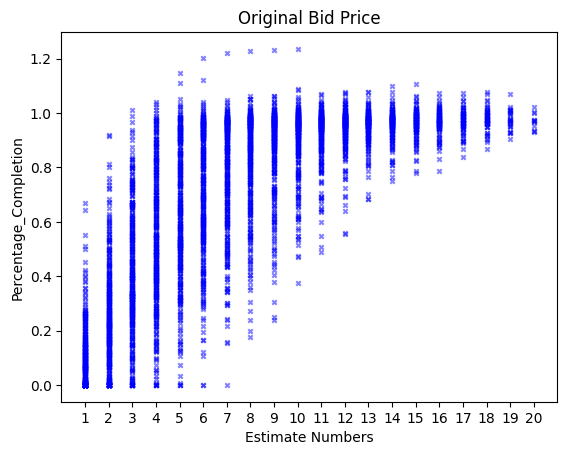

In [49]:
# For 0-20 range

plt.scatter(dataframes_by_category['0-20']['ESTIMATE_NBR'], dataframes_by_category['0-20']['C_PERCENT_2'], color='blue', marker = 'x', s = 10, alpha = 0.5)
plt.xlabel('Estimate Numbers')
plt.ylabel('Percentage_Completion')
plt.title('Original Bid Price')
min_x = dataframes_by_category['0-20']['ESTIMATE_NBR'].min()
max_x = dataframes_by_category['0-20']['ESTIMATE_NBR'].max()
plt.xlim(min_x-1, max_x+1)
plt.xticks(range(min_x, max_x + 1))
plt.show()

In [50]:
# plot and save the figures for each category OBP

import os

save_dir = "E:/CTR1/Project/Result_images"

# Plot and save for each category
for category_label, df in dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_1'], color='blue', marker = 'x', s = 10, alpha = 0.5)
    plt.title(f'Cost Progression for Estimate number in {category_label} Category (OBP)')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')

    plt.savefig(os.path.join(save_dir, f'cost_progression_OBP{category_label}.png'))
    plt.close()

In [51]:
# plot and save the figures for each category RBP

import os

save_dir = "E:/CTR1/Project/Result_images"

# Plot and save for each category
for category_label, df in dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_2'], color='blue', marker = 'x', s = 10, alpha = 0.5)
    plt.title(f'Cost Progression for Estimate number in {category_label} Category (RBP)')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')

    plt.savefig(os.path.join(save_dir, f'cost_progression_RBP{category_label}.png'))
    plt.close()

## By OBP Price Range

In [54]:
# Analysis by OBP price

# Categorize the CNNBR1 values into bins
OBP['CNNBR1_Category'] = pd.cut(OBP['CNNBR1'], bins=cnnbr1_bins, labels=cnnbr1_labels, right=False)

# Merge this categorized data with the original dataset to filter rows based on the categorized ranges
categorized_OBP_data = pd.merge(cost_data, OBP[['CCSJ', 'CNNBR1_Category']], on='CCSJ', how='left')

# Separate dataframes for each category
obp_dataframes_by_category = {}
for category in cnnbr1_labels:
    category_df = categorized_OBP_data[categorized_OBP_data['CNNBR1_Category'] == category]
    obp_dataframes_by_category[category] = category_df

In [59]:
obp_dataframes_by_category['0-0.5M'].head()

,CCSJ,ESTIMATE_NBR,ESTIMATE_TYPE,TOTAL_WRK_TO_DT,CNNBR1,TOT_BID_AMT,NET_C_O_AMT,T_CONT.TOT_BID_AMT+T_CONT.NET_,C_PERCENT_1,C_PERCENT_2,CNNBR1_Category
49,0002-14-042,1,PROG,162248.16,457012.0,472012.0,154014.31,626026.31,0.355019,0.259171,0-0.5M
50,0002-14-042,2,PROG,361723.74,457012.0,472012.0,154014.31,626026.31,0.791497,0.577809,0-0.5M
51,0002-14-042,3,PROG,446142.91,457012.0,472012.0,154014.31,626026.31,0.976217,0.712658,0-0.5M
52,0002-14-042,4,PROG,504932.53,457012.0,472012.0,154014.31,626026.31,1.104856,0.806568,0-0.5M
53,0002-14-042,5,PROG,590817.30,457012.0,472012.0,154014.31,626026.31,1.292783,0.943758,0-0.5M


In [69]:
# Original Bid Price

save_dir = "E:/CTR1/Project/Result_images/OBP_GROUP/OBP"

# Plot and save for each category
for category_label, df in obp_dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_1'], color='blue', marker = 'x', s = 10, alpha = 0.5)
    plt.title(f'Cost Progression for OBP in {category_label} Category (OBP)')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')

    plt.savefig(os.path.join(save_dir, f'cost_progression_OBP_in{category_label}.png'))
    plt.close()

In [62]:
# Revised Bid Price

save_dir = "E:/CTR1/Project/Result_images"

# Plot and save for each category
for category_label, df in obp_dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_2'], color='blue', marker = 'x', s = 10, alpha = 0.5)
    plt.title(f'Cost Progression for OBP in {category_label} Category (RBP)')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')

    plt.savefig(os.path.join(save_dir, f'cost_progression_RBP{category_label}.png'))
    plt.close()

In [63]:
# Combined

# Original Bid Price

save_dir = "E:/CTR1/Project/Result_images"

# Plot and save for each category
for category_label, df in obp_dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_1'], color='blue', marker = 'x', s = 10, alpha = 0.5, label = 'OBP')
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_2'], color='red', marker = '+', s = 10, alpha = 0.5, label = 'RBP')
    plt.title(f'Cost Progression for OBP in {category_label} Category')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')
    plt.legend()

    plt.savefig(os.path.join(save_dir, f'cost_progression_OBP{category_label}.png'))
    plt.close()

## By Revised Bid Price Range

In [67]:
# Analysis by OBP price

# Categorize the CNNBR1 values into bins
RBP['RBP_Category'] = pd.cut(RBP['T_CONT.TOT_BID_AMT+T_CONT.NET_'], bins=rbp_bins, labels=rbp_labels, right=True)

# Merge this categorized data with the original dataset to filter rows based on the categorized ranges
categorized_RBP_data = pd.merge(cost_data, RBP[['CCSJ', 'RBP_Category']], on='CCSJ', how='left')

# Separate dataframes for each category
rbp_dataframes_by_category = {}
for category in rbp_labels:
    category_df = categorized_RBP_data[categorized_RBP_data['RBP_Category'] == category]
    rbp_dataframes_by_category[category] = category_df

In [68]:
rbp_dataframes_by_category['0-0.5M'].head()

,CCSJ,ESTIMATE_NBR,ESTIMATE_TYPE,TOTAL_WRK_TO_DT,CNNBR1,TOT_BID_AMT,NET_C_O_AMT,T_CONT.TOT_BID_AMT+T_CONT.NET_,C_PERCENT_1,C_PERCENT_2,RBP_Category
238,0014-05-037,1,PROG,170287.14,243706.62,253956.62,0.0,253956.62,0.698738,0.670536,0-0.5M
239,0014-05-037,2,PROG,232479.58,243706.62,253956.62,0.0,253956.62,0.953932,0.915430,0-0.5M
240,0014-05-037,3,PROG,238245.02,243706.62,253956.62,0.0,253956.62,0.977589,0.938133,0-0.5M
241,0014-05-037,4,PROG,240295.02,243706.62,253956.62,0.0,253956.62,0.986001,0.946205,0-0.5M
242,0014-05-037,5,PROG,240295.02,243706.62,253956.62,0.0,253956.62,0.986001,0.946205,0-0.5M


In [70]:
# Original Bid Price

save_dir = "E:/CTR1/Project/Result_images/RBP_GROUP/obp"

# Plot and save for each category
for category_label, df in rbp_dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_1'], color='blue', marker = 'x', s = 10, alpha = 0.5)
    plt.title(f'Cost Progression for RBP in {category_label} Category (OBP)')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')

    plt.savefig(os.path.join(save_dir, f'cost_progression_RBP_in{category_label}.png'))
    plt.close()

In [71]:
# Revised Bid Price

save_dir = "E:/CTR1/Project/Result_images/RBP_GROUP/rbp"

# Plot and save for each category
for category_label, df in rbp_dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_2'], color='blue', marker = 'x', s = 10, alpha = 0.5)
    plt.title(f'Cost Progression for RBP in {category_label} Category (RBP)')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')

    plt.savefig(os.path.join(save_dir, f'cost_progression(RBP)_RBP_in{category_label}.png'))
    plt.close()

In [72]:
# Combined

# Original Bid Price

save_dir = "E:/CTR1/Project/Result_images/RBP_GROUP/orbp"

# Plot and save for each category
for category_label, df in rbp_dataframes_by_category.items():
    
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_1'], color='blue', marker = 'x', s = 10, alpha = 0.5, label = 'OBP')
    plt.scatter(df['ESTIMATE_NBR'], df['C_PERCENT_2'], color='red', marker = '+', s = 10, alpha = 0.5, label = 'RBP')
    plt.title(f'Cost Progression for OBP in {category_label} Category')
    plt.xlabel('Estimate numbers')
    plt.ylabel('Percent Complete')
    plt.legend()

    plt.savefig(os.path.join(save_dir, f'cost_progression(RBP)_RBP_in{category_label}.png'))
    plt.close()

## Time Data

In [4]:
# Import the data

time_data = pd.read_excel('E:/CTR1/Data Sheet/Time-Cost Data (Practice).xlsx', sheet_name = 1)

In [74]:
time_data.columns.unique()

Index(['DIARY_CSJ', 'DIARY_DT', 'LW_T', 'HI_T', 'AMC', 'PMC', 'EST_NR',
       'CHRG_DAYS', 'CRED_REAS', 'ADJ_EST_NBR', 'ADJ_DAYS', 'ADJ_REAS',
       'USER_NAME', 'MOD_DT', 'REAS_TXT', 'CONTRACTOR_WRK_HRS', 'GENERAL_SM',
       'GENERAL_LG', 'VISITOR', 'ACCIDENT', 'TRAFFIC', 'EEO_ISSUES',
       'SAFETY_VIOLATIONS', 'DISPUTE_CLAIM', 'OTHER', 'SW3P', 'BID_DAYS',
       'DAYS_GRANTED', 'TOT_DAY_ALLOWED', 'LD_RATE', 'WK_BGN', 'TIME_BGN',
       'ACPT_DT', 'FED_PROJ', 'CONTRACT_ID', 'HWY', 'MGR_NBR', 'DIST',
       'COUNTY', 'ORIG_BID_PRICE', 'AE', 'CONTRACTOR', 'PREV_TOT_CHRG_DA',
       'CUR_CHRG_DA', '(PREV_TOT_CHRG_DA+CUR_CHRG_DA)', 'ADJ_POS', 'ADJ_NEG',
       'ADJ_HALF', 'ORIG_PRJ', 'ORIG_ACTL', 'ADJ_PRJ', 'ADJ_ACTL', 'SWKC_DT',
       'CD_DESC'],
      dtype='object')

In [5]:
time = time_data[['DIARY_CSJ', 'EST_NR', 'CHRG_DAYS', 'ADJ_DAYS','BID_DAYS', 'DAYS_GRANTED', 'TOT_DAY_ALLOWED']]

In [6]:
# Group by DIARY_CSJ and EST_NR, then calculate the sum of CHRG_DAYS and ADJ_DAYS

time_calculation = time.groupby(['DIARY_CSJ', 'EST_NR']).agg({'CHRG_DAYS': 'sum', 'ADJ_DAYS': 'sum'}).reset_index()

In [7]:
# Calculate the NEW_CHRG_DAYS as the sum of CHRG_DAYS and ADJ_DAYS

time_calculation['NEW_CHRG_DAYS'] = time_calculation['CHRG_DAYS'] + time_calculation['ADJ_DAYS']

In [8]:
# Calculate the cumulative CHRG_DAYS for each DIARY_CSJ

time_calculation['CUMULATIVE_CHRG_DAYS'] = time_calculation.groupby('DIARY_CSJ')['NEW_CHRG_DAYS'].cumsum()

In [9]:
# Get the first occurrence of BID_DAYS, DAYS_GRANTED, and (PREV_TOT_CHRG_DA+CUR_CHRG_DA) for each EST_NR in each DIARY_CSJ

additional_columns = time.groupby(['DIARY_CSJ', 'EST_NR']).agg({'BID_DAYS': 'first', 'DAYS_GRANTED': 'first', 'TOT_DAY_ALLOWED': 'first'}).reset_index()

In [10]:
# Merge the grouped_df with additional_columns to add BID_DAYS, DAYS_GRANTED, and (PREV_TOT_CHRG_DA+CUR_CHRG_DA)

time_calculation = pd.merge(time_calculation, additional_columns, on=['DIARY_CSJ', 'EST_NR'])

In [11]:
# Original percentage

time_calculation['TIME_PERCENT_1'] = time_calculation['CUMULATIVE_CHRG_DAYS'] / time_calculation['BID_DAYS']

In [12]:
# Adjusted percentage

time_calculation['TIME_PERCENT_2'] = time_calculation['CUMULATIVE_CHRG_DAYS'] / time_calculation['TOT_DAY_ALLOWED']

In [13]:
time_calculation.head(10)

,DIARY_CSJ,EST_NR,CHRG_DAYS,ADJ_DAYS,NEW_CHRG_DAYS,CUMULATIVE_CHRG_DAYS,BID_DAYS,DAYS_GRANTED,TOT_DAY_ALLOWED,TIME_PERCENT_1,TIME_PERCENT_2
0,0002-07-043,1.0,13.0,0.0,13.0,13.0,200,77,277,0.065,0.046931
1,0002-07-043,2.0,23.0,0.0,23.0,36.0,200,77,277,0.180,0.129964
2,0002-07-043,3.0,21.0,0.0,21.0,57.0,200,77,277,0.285,0.205776
3,0002-07-043,4.0,22.0,0.0,22.0,79.0,200,77,277,0.395,0.285199
4,0002-07-043,5.0,22.0,0.0,22.0,101.0,200,77,277,0.505,0.364621
5,0002-07-043,6.0,20.0,0.0,20.0,121.0,200,77,277,0.605,0.436823
6,0002-07-043,7.0,21.0,0.0,21.0,142.0,200,77,277,0.710,0.512635
7,0002-07-043,8.0,25.0,0.0,25.0,167.0,200,77,277,0.835,0.602888
8,0002-07-043,9.0,22.0,0.0,22.0,189.0,200,77,277,0.945,0.682310
9,0002-07-043,10.0,22.0,0.0,22.0,211.0,200,77,277,1.055,0.761733


## Original Bid Days and Revised Bid Days

In [96]:
time_calculation.describe()

,EST_NR,CHRG_DAYS,ADJ_DAYS,NEW_CHRG_DAYS,CUMULATIVE_CHRG_DAYS,BID_DAYS,DAYS_GRANTED,TOT_DAY_ALLOWED,TIME_PERCENT_1,TIME_PERCENT_2
count,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000,11278.000000
mean,14.053822,9.643554,-0.061004,9.582550,167.399273,231.338535,30.350239,261.688775,0.750534,0.677868
std,12.302282,9.612346,0.855843,9.598209,188.392290,184.406788,80.668966,240.594642,0.514907,0.432928
min,1.000000,0.000000,-23.000000,0.000000,0.000000,38.000000,-70.000000,45.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,53.000000,106.000000,0.000000,115.000000,0.359261,0.331522
50%,11.000000,9.000000,0.000000,8.000000,109.000000,180.000000,0.000000,190.000000,0.774011,0.729423
75%,19.000000,19.000000,0.000000,19.000000,218.000000,292.000000,25.000000,316.750000,1.028571,0.984288
max,88.000000,137.000000,25.000000,137.000000,1760.000000,1177.000000,702.000000,1787.000000,4.869048,3.230769


In [21]:
time_calculation['DIARY_CSJ'].nunique(0)

578

In [14]:
time_calculation = time_calculation.sort_values(by=['DIARY_CSJ', 'EST_NR'])

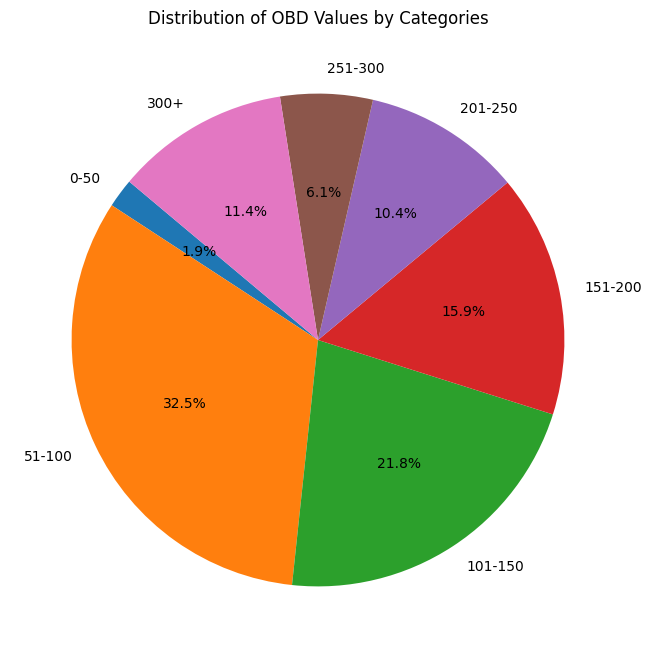

In [15]:
# Group by CCSJ and get the first value of BID_DAYS for each CCSJ
bid_data = time_calculation.groupby('DIARY_CSJ')['BID_DAYS'].first().reset_index()

# Define bins for categorizing the OBD values
bid_bins = [0, 50, 100, 150, 200, 250, 300, float('inf')]
bid_labels = ['0-50', '51-100', '101-150','151-200', '201-250', '251-300', '300+']

# Categorize the OBD values into bins
bid_data['bid_Category'] = pd.cut(bid_data['BID_DAYS'], bins=bid_bins, labels=bid_labels, right=True)

# Count the number of CCSJ in each category
bid_distribution = bid_data['bid_Category'].value_counts().sort_index()

# Plot the pie chart for the distribution of OBD values
plt.figure(figsize=(10, 8))
plt.pie(bid_distribution, labels=bid_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of OBD Values by Categories')
plt.show()

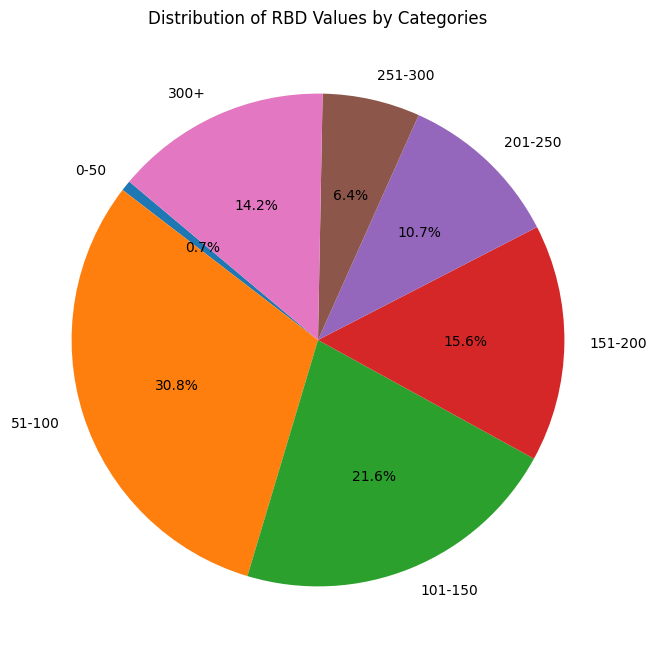

In [16]:
# Group by CCSJ and get the first value of BID_DAYS for each CCSJ
RBD = time_calculation.groupby('DIARY_CSJ')['TOT_DAY_ALLOWED'].first().reset_index()

# Define bins for categorizing the OBD values
rbd_bins = [0, 50, 100, 150, 200, 250, 300, float('inf')]
rbd_labels = ['0-50', '51-100', '101-150','151-200', '201-250', '251-300', '300+']

# Categorize the OBD values into bins
RBD['rbd_Category'] = pd.cut(RBD['TOT_DAY_ALLOWED'], bins=rbd_bins, labels=rbd_labels, right=True)

# Count the number of CCSJ in each category
rbd_distribution = RBD['rbd_Category'].value_counts().sort_index()

# Plot the pie chart for the distribution of OBD values
plt.figure(figsize=(10, 8))
plt.pie(rbd_distribution, labels=rbd_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of RBD Values by Categories')
plt.show()

In [16]:
# time_calculation.to_excel('time_cal.xlsx', index = False)

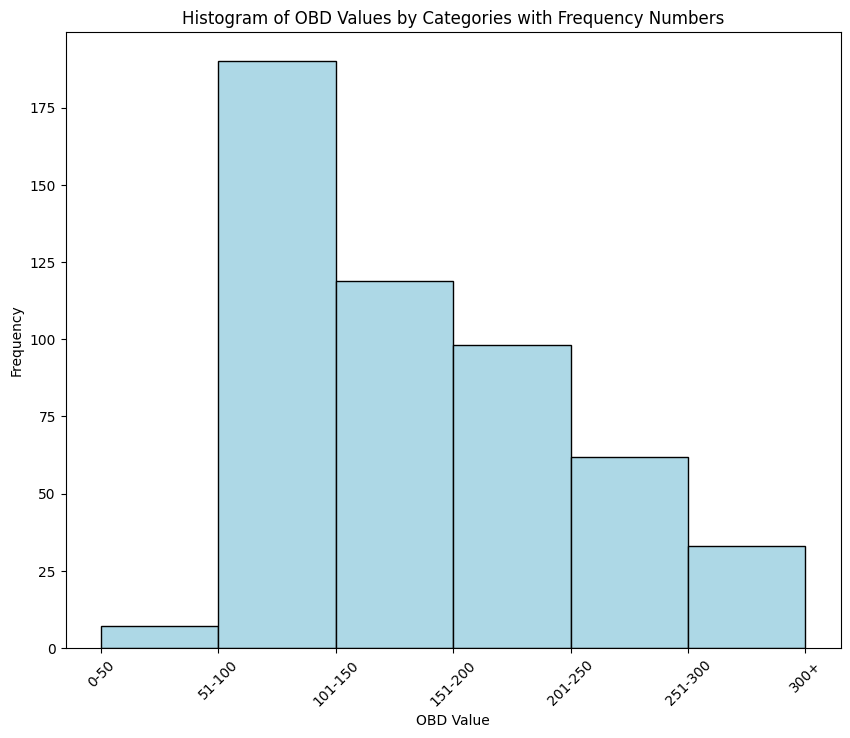

In [39]:
# Draw the histogram for OBD values

plt.figure(figsize=(10, 8))
counts, bins, patches = plt.hist(bid_data['BID_DAYS'], bins=bid_bins, color='lightblue', edgecolor='black')

plt.title('Histogram of OBD Values by Categories with Frequency Numbers')
plt.xlabel('OBD Value')
plt.ylabel('Frequency')
plt.xticks(bid_bins[:-1], labels=bid_labels, rotation=45)  # Exclude the last bin for correct labeling
plt.show()

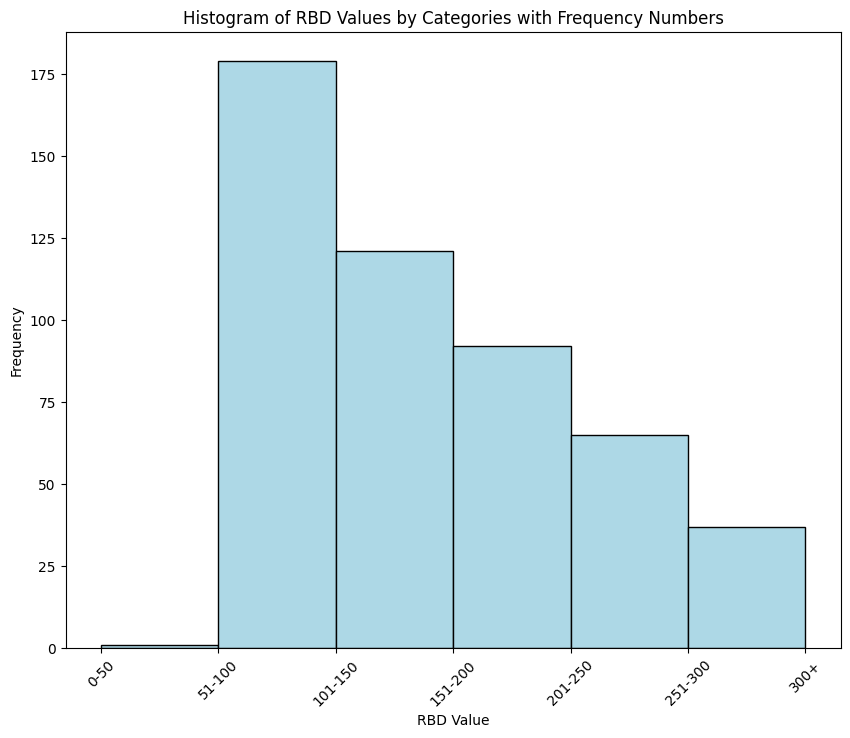

In [40]:
# Draw the histogram for RBD values

plt.figure(figsize=(10, 8))
counts, bins, patches = plt.hist(RBD['TOT_DAY_ALLOWED'], bins=rbd_bins, color='lightblue', edgecolor='black')

plt.title('Histogram of RBD Values by Categories with Frequency Numbers')
plt.xlabel('RBD Value')
plt.ylabel('Frequency')
plt.xticks(rbd_bins[:-1], labels=rbd_labels, rotation=45)  # Exclude the last bin for correct labeling
plt.show()

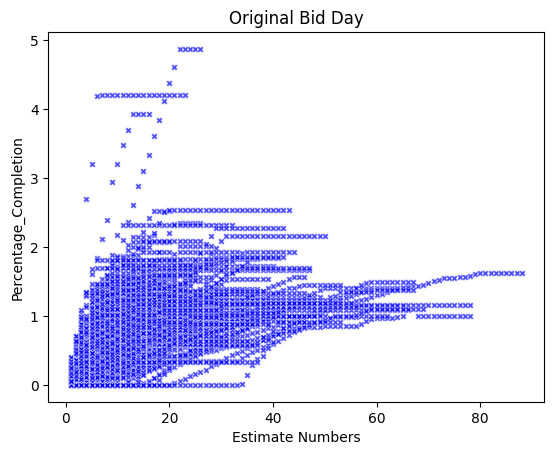

In [42]:
# General scatterplot of PERCENT complete in OBD

sns.scatterplot(x='EST_NR', y='TIME_PERCENT_1', data = time_calculation,  color='blue', s=20, alpha=0.7, marker='X')
plt.xlabel('Estimate Numbers')
plt.ylabel('Percentage_Completion')
plt.title('Original Bid Day')
plt.show()

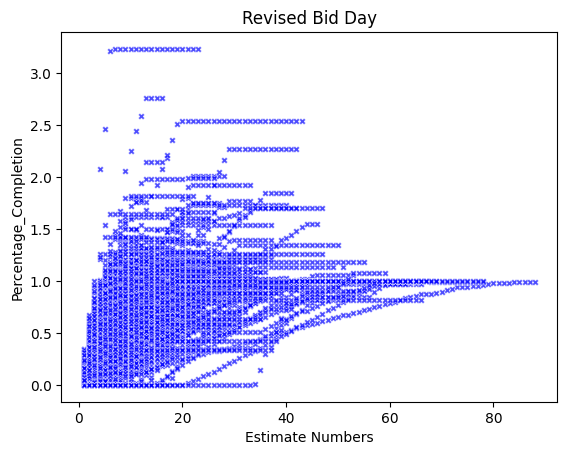

In [45]:
# General scatterplot of PERCENT complete in RBD

sns.scatterplot(x='EST_NR', y='TIME_PERCENT_2', data = time_calculation,  color='blue', s=20, alpha=0.7, marker='X')
plt.xlabel('Estimate Numbers')
plt.ylabel('Percentage_Completion')
plt.title('Revised Bid Day')
plt.show()

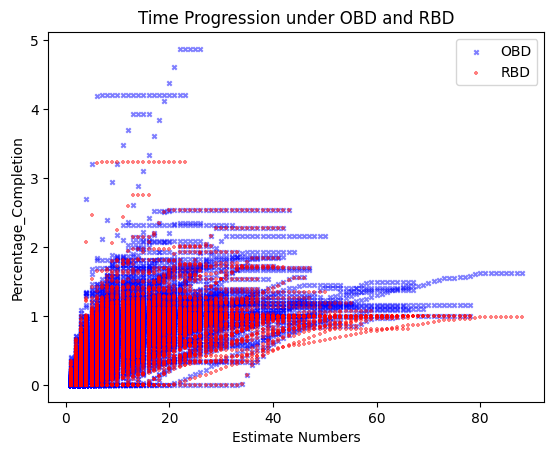

In [47]:
# Combined plot

plt.scatter(time_calculation['EST_NR'], time_calculation['TIME_PERCENT_1'],  color='blue', s=10, alpha=0.5, marker='x', label = 'OBD')
plt.scatter(time_calculation['EST_NR'], time_calculation['TIME_PERCENT_2'],  color='red', s=10, alpha=0.5, marker='+', label = 'RBD')
plt.xlabel('Estimate Numbers')
plt.ylabel('Percentage_Completion')
plt.title('Time Progression under OBD and RBD')
plt.legend()
plt.show()

## Time Cost Correlation

In [51]:
# Pick out target columns

cdata = cost_data[['CCSJ', 'ESTIMATE_NBR', 'C_PERCENT_1', 'C_PERCENT_2']]
tdata = time_calculation[['DIARY_CSJ', 'EST_NR', 'TIME_PERCENT_1', 'TIME_PERCENT_2']]

In [59]:
# Convert data types

import numpy as np

cdata['ESTIMATE_NBR'] = cdata['ESTIMATE_NBR'].astype(np.int64)
tdata['EST_NR'] = tdata['EST_NR'].astype(np.int64)

In [56]:
cdata.head(10)

,CCSJ,ESTIMATE_NBR,C_PERCENT_1,C_PERCENT_2
0,0002-07-043,1,0.112458,0.109139
1,0002-07-043,2,0.275307,0.267183
2,0002-07-043,3,0.414690,0.402452
3,0002-07-043,4,0.572489,0.555595
4,0002-07-043,5,0.614068,0.595947
5,0002-07-043,6,0.647675,0.628562
6,0002-07-043,7,0.686080,0.665833
7,0002-07-043,8,0.835877,0.811210
8,0002-07-043,9,0.911706,0.884801
9,0002-07-043,10,0.935106,0.907511


In [60]:
tdata.head(10)

,DIARY_CSJ,EST_NR,TIME_PERCENT_1,TIME_PERCENT_2
0,0002-07-043,1,0.065,0.046931
1,0002-07-043,2,0.180,0.129964
2,0002-07-043,3,0.285,0.205776
3,0002-07-043,4,0.395,0.285199
4,0002-07-043,5,0.505,0.364621
5,0002-07-043,6,0.605,0.436823
6,0002-07-043,7,0.710,0.512635
7,0002-07-043,8,0.835,0.602888
8,0002-07-043,9,0.945,0.682310
9,0002-07-043,10,1.055,0.761733


In [57]:
print(tdata.dtypes)

DIARY_CSJ          object
EST_NR            float64
TIME_PERCENT_1    float64
TIME_PERCENT_2    float64
dtype: object


In [58]:
print(cdata.dtypes)

CCSJ             object
ESTIMATE_NBR      int64
C_PERCENT_1     float64
C_PERCENT_2     float64
dtype: object


In [64]:
print(cdata.shape)

(11429, 4)


In [65]:
print(tdata.shape)

(11278, 4)


In [66]:
# Save the data file

cdata.to_excel('cdata.xlsx', index = False)
tdata.to_excel('tdata.xlsx', index = False)

In [67]:
# Merge the data sets by corresponding CCSJ and EST number

tcdata = pd.merge(cdata, tdata, left_on = ['CCSJ', 'ESTIMATE_NBR'], right_on = ['DIARY_CSJ', 'EST_NR'], how = 'left')

In [68]:
tcdata.head(10)

,CCSJ,ESTIMATE_NBR,C_PERCENT_1,C_PERCENT_2,DIARY_CSJ,EST_NR,TIME_PERCENT_1,TIME_PERCENT_2
0,0002-07-043,1,0.112458,0.109139,0002-07-043,1.0,0.065,0.046931
1,0002-07-043,2,0.275307,0.267183,0002-07-043,2.0,0.180,0.129964
2,0002-07-043,3,0.414690,0.402452,0002-07-043,3.0,0.285,0.205776
3,0002-07-043,4,0.572489,0.555595,0002-07-043,4.0,0.395,0.285199
4,0002-07-043,5,0.614068,0.595947,0002-07-043,5.0,0.505,0.364621
5,0002-07-043,6,0.647675,0.628562,0002-07-043,6.0,0.605,0.436823
6,0002-07-043,7,0.686080,0.665833,0002-07-043,7.0,0.710,0.512635
7,0002-07-043,8,0.835877,0.811210,0002-07-043,8.0,0.835,0.602888
8,0002-07-043,9,0.911706,0.884801,0002-07-043,9.0,0.945,0.682310
9,0002-07-043,10,0.935106,0.907511,0002-07-043,10.0,1.055,0.761733


In [69]:
# Locate the rows with missing value

rows_with_missing = tcdata[tcdata.isna().any(axis=1)]

In [73]:
print(tcdata.shape)

(11429, 8)


In [71]:
print(rows_with_missing.shape)

(151, 8)


In [70]:
rows_with_missing.head(10)

,CCSJ,ESTIMATE_NBR,C_PERCENT_1,C_PERCENT_2,DIARY_CSJ,EST_NR,TIME_PERCENT_1,TIME_PERCENT_2
19,0002-07-043,20,1.054791,1.023663,NaN,NaN,NaN,NaN
37,0002-07-049,18,1.170442,0.982479,NaN,NaN,NaN,NaN
38,0002-07-049,19,1.166885,0.979493,NaN,NaN,NaN,NaN
185,0009-12-072,50,0.958421,0.960178,NaN,NaN,NaN,NaN
187,0009-12-072,52,0.964827,0.966595,NaN,NaN,NaN,NaN
265,0014-13-003,19,1.066503,1.013110,NaN,NaN,NaN,NaN
437,0016-02-135,35,1.027365,0.978353,NaN,NaN,NaN,NaN
438,0016-02-135,36,1.027365,0.978353,NaN,NaN,NaN,NaN
720,0038-04-054,67,1.007940,0.911128,NaN,NaN,NaN,NaN
777,0041-07-097,31,1.010403,0.990776,NaN,NaN,NaN,NaN


In [72]:
# Remove the rows with missing values

tcdata_clean = tcdata.dropna()

In [81]:
# Calculate the difference between the percentages

tcdata_clean['PERCENT_DIFF_1'] = tcdata_clean['C_PERCENT_1'] - tcdata_clean['TIME_PERCENT_1']
tcdata_clean['PERCENT_DIFF_2'] = tcdata_clean['C_PERCENT_2'] - tcdata_clean['TIME_PERCENT_2']

In [74]:
# Check shape

print(tcdata_clean.shape)

(11278, 8)


In [84]:
# Save the data file

tcdata_clean.to_excel('tcdata_clean.xlsx', index = False)

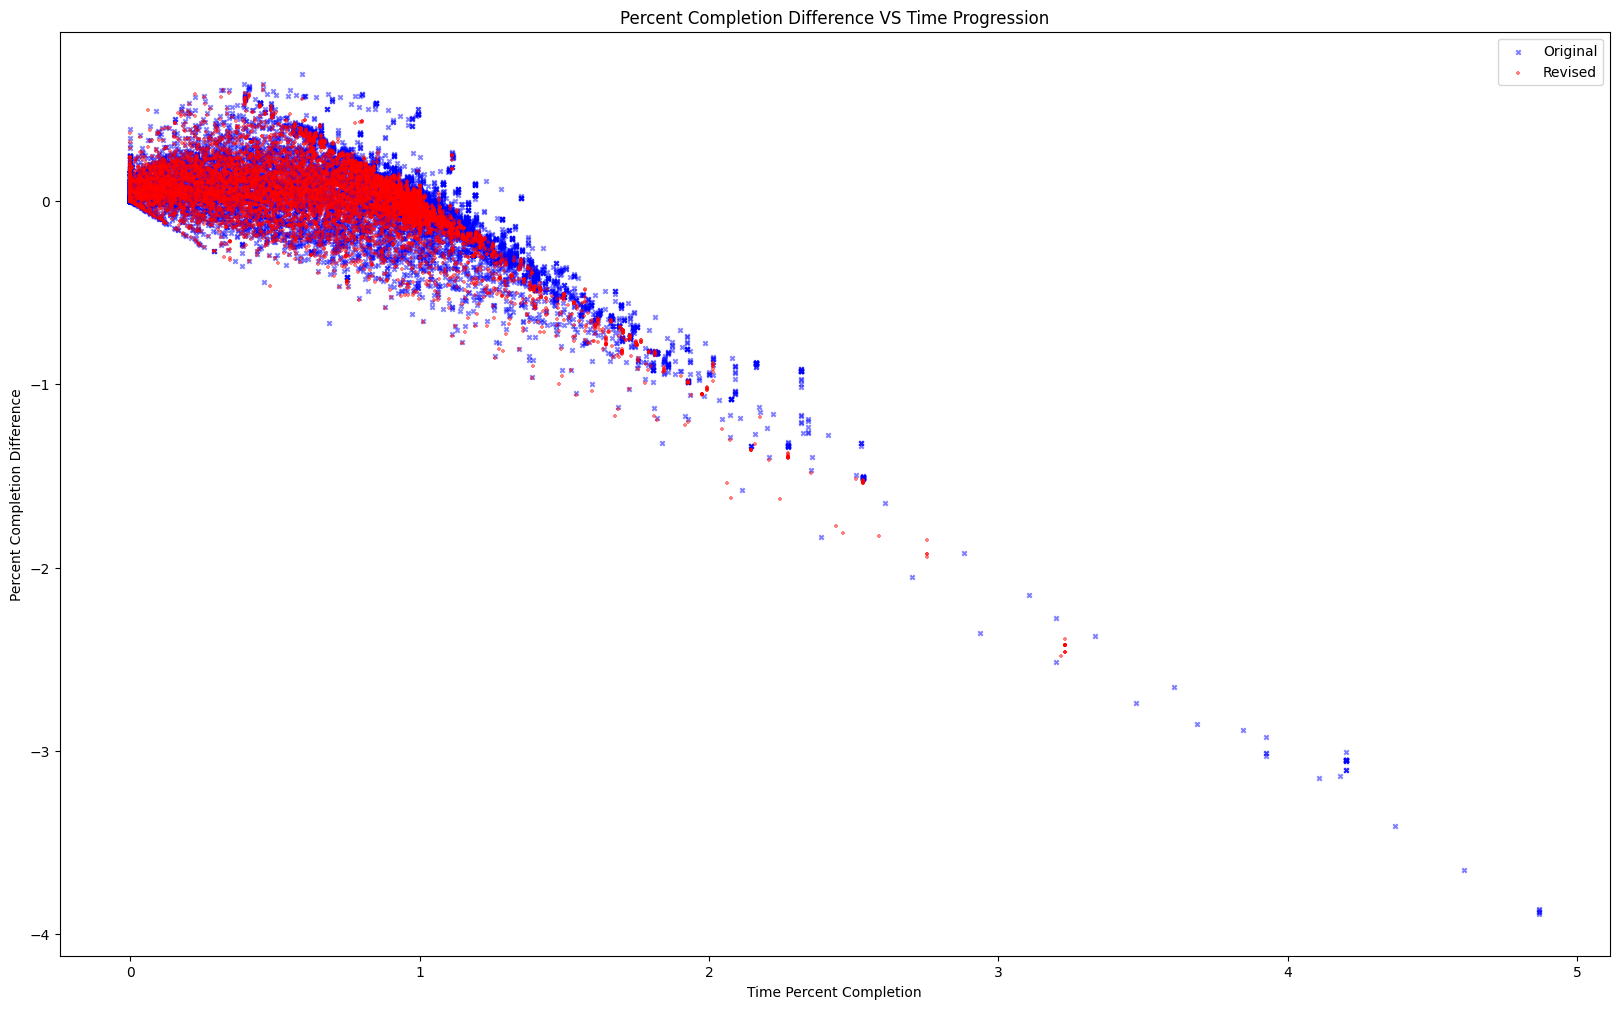

In [82]:
# Plot the difference in time cost progression under original and revised condition

plt.figure(figsize = (20, 12))

plt.scatter(tcdata_clean['TIME_PERCENT_1'], tcdata_clean['PERCENT_DIFF_1'], color = 'blue', marker = 'x', alpha = 0.5, s = 10, label = 'Original')
plt.scatter(tcdata_clean['TIME_PERCENT_2'], tcdata_clean['PERCENT_DIFF_2'], color = 'red', marker = '+', alpha = 0.5, s = 10, label = 'Revised')

plt.xlabel('Time Percent Completion')
plt.ylabel('Percent Completion Difference')
plt.title('Percent Completion Difference VS Time Progression')
plt.legend()

plt.show()

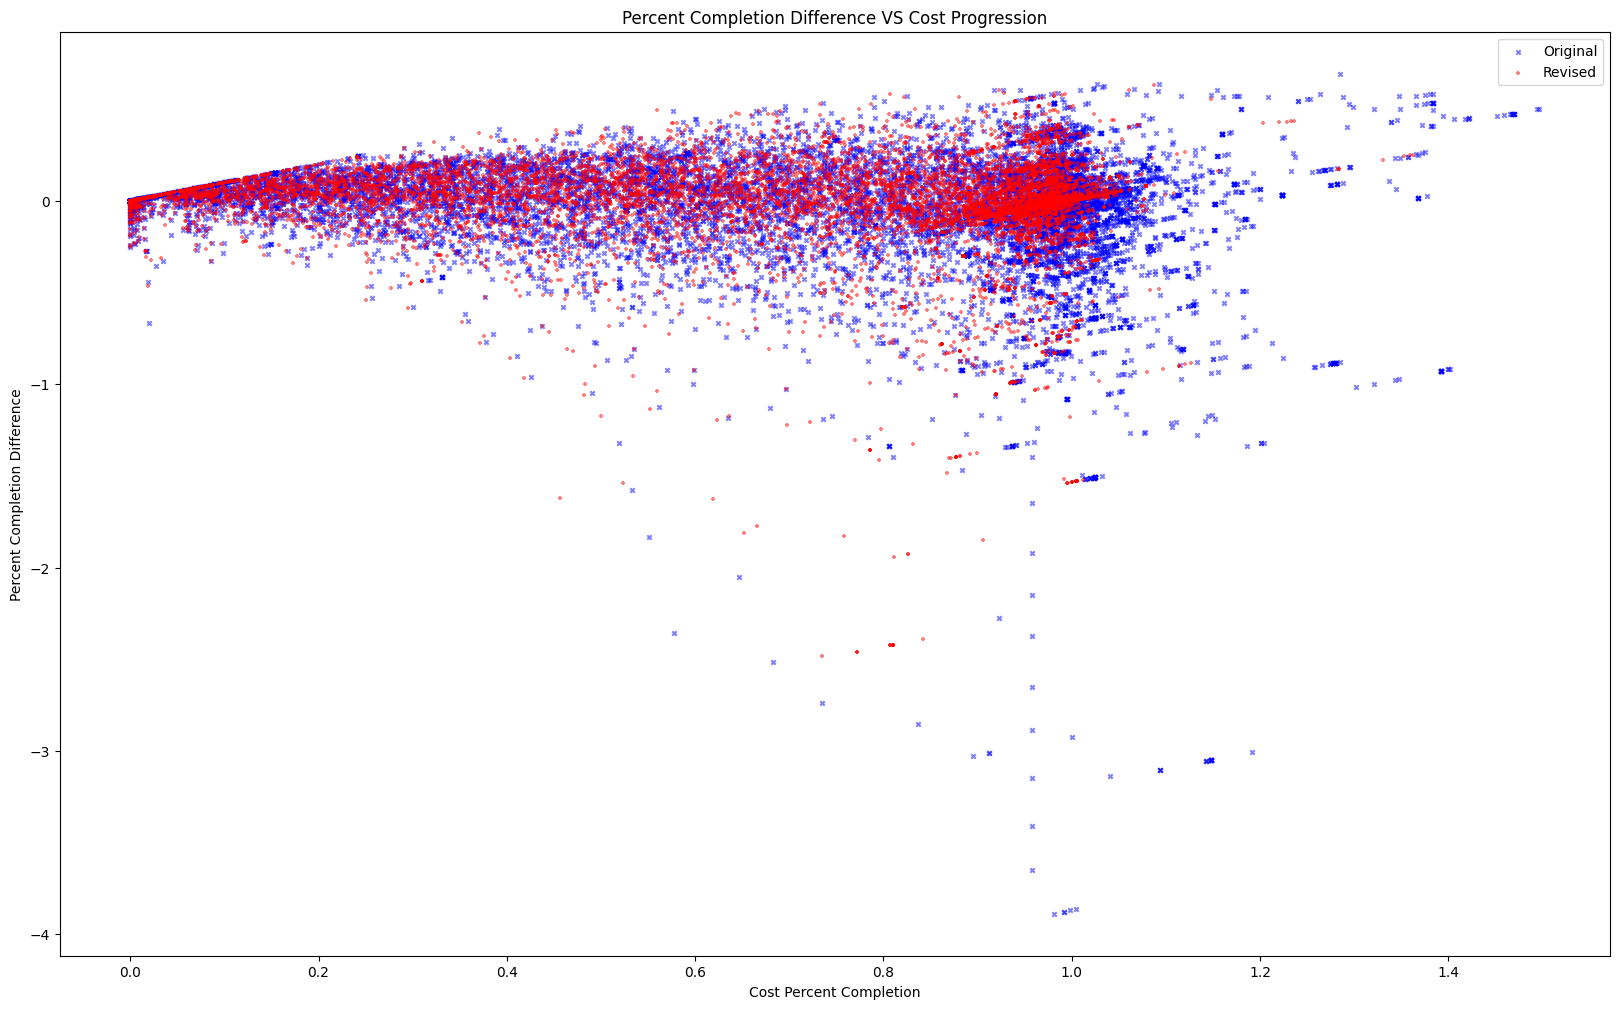

In [83]:
# Plot the difference in time cost progression under original and revised condition

plt.figure(figsize = (20, 12))

plt.scatter(tcdata_clean['C_PERCENT_1'], tcdata_clean['PERCENT_DIFF_1'], color = 'blue', marker = 'x', alpha = 0.5, s = 10, label = 'Original')
plt.scatter(tcdata_clean['C_PERCENT_2'], tcdata_clean['PERCENT_DIFF_2'], color = 'red', marker = '+', alpha = 0.5, s = 10, label = 'Revised')

plt.xlabel('Cost Percent Completion')
plt.ylabel('Percent Completion Difference')
plt.title('Percent Completion Difference VS Cost Progression')
plt.legend()

plt.show()

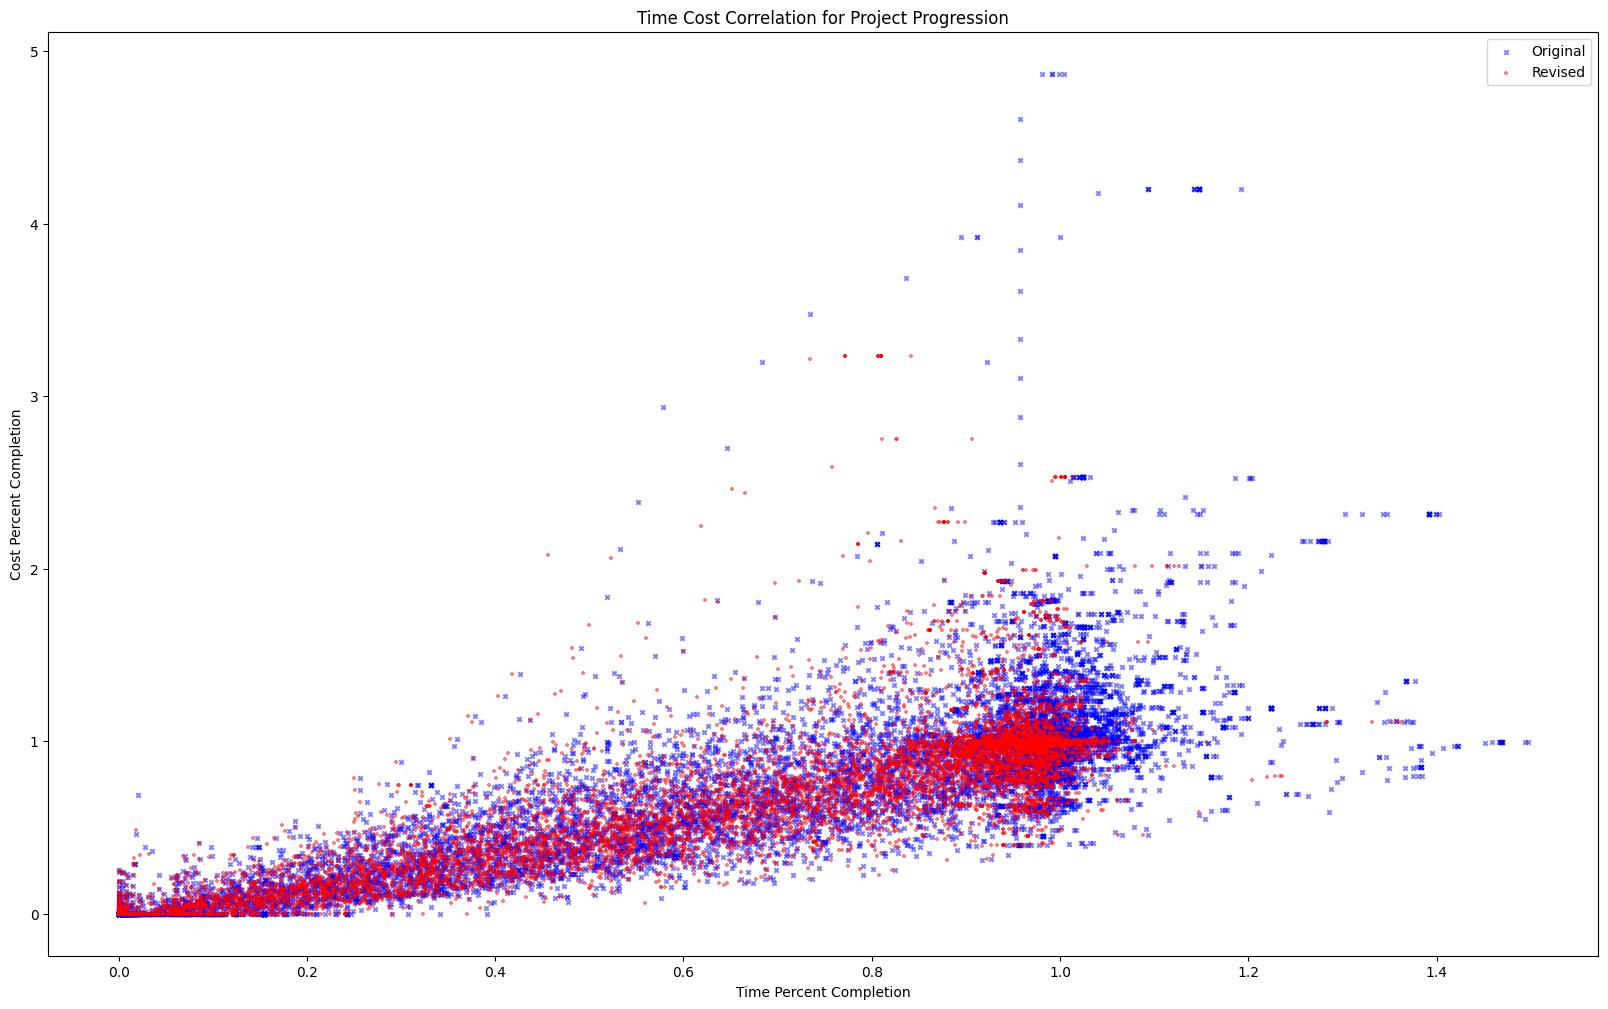

In [79]:
# Plot the time cost relation under original and revised condition

plt.figure(figsize = (20, 12))

plt.scatter(tcdata_clean['C_PERCENT_1'], tcdata_clean['TIME_PERCENT_1'], color = 'blue', marker = 'x', alpha = 0.5, s = 10, label = 'Original')
plt.scatter(tcdata_clean['C_PERCENT_2'], tcdata_clean['TIME_PERCENT_2'], color = 'red', marker = '+', alpha = 0.5, s = 10, label = 'Revised')

plt.xlabel('Time Percent Completion')
plt.ylabel('Cost Percent Completion')
plt.title('Time Cost Correlation for Project Progression')
plt.legend()

plt.show()

# Regression Analysis

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [121]:
tcdata_clean.head(10)

,CCSJ,ESTIMATE_NBR,C_PERCENT_1,C_PERCENT_2,DIARY_CSJ,EST_NR,TIME_PERCENT_1,TIME_PERCENT_2,PERCENT_DIFF_1,PERCENT_DIFF_2
0,0002-07-043,1,0.112458,0.109139,0002-07-043,1.0,0.065,0.046931,0.047458,0.062208
1,0002-07-043,2,0.275307,0.267183,0002-07-043,2.0,0.180,0.129964,0.095307,0.137219
2,0002-07-043,3,0.414690,0.402452,0002-07-043,3.0,0.285,0.205776,0.129690,0.196676
3,0002-07-043,4,0.572489,0.555595,0002-07-043,4.0,0.395,0.285199,0.177489,0.270396
4,0002-07-043,5,0.614068,0.595947,0002-07-043,5.0,0.505,0.364621,0.109068,0.231326
5,0002-07-043,6,0.647675,0.628562,0002-07-043,6.0,0.605,0.436823,0.042675,0.191739
6,0002-07-043,7,0.686080,0.665833,0002-07-043,7.0,0.710,0.512635,-0.023920,0.153198
7,0002-07-043,8,0.835877,0.811210,0002-07-043,8.0,0.835,0.602888,0.000877,0.208322
8,0002-07-043,9,0.911706,0.884801,0002-07-043,9.0,0.945,0.682310,-0.033294,0.202490
9,0002-07-043,10,0.935106,0.907511,0002-07-043,10.0,1.055,0.761733,-0.119894,0.145778


## Time Cost Relation (Original)

In [87]:
# Simple linear 

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['C_PERCENT_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5805525299510583

In [88]:
# Exponential

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['C_PERCENT_1']

y_exp = np.log(y + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x, y_exp, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.14823810553747985

In [89]:
# Logrithmic

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['C_PERCENT_1']

x_log = np.log(x + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x_log, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.3664898865159797

In [95]:
# Polynomial 2nd degree

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['C_PERCENT_1']

poly = PolynomialFeatures(degree=2)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7622808724378716

In [96]:
# Polynomial 3rd degree

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['C_PERCENT_1']

poly = PolynomialFeatures(degree=3)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8085947797738049

In [97]:
# Polynomial 4rd degree

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['C_PERCENT_1']

poly = PolynomialFeatures(degree=4)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.810594502166595

## Time Cost Relation Revised

In [98]:
# Simple linear 

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['C_PERCENT_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6378627256882603

In [99]:
# Exponential

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['C_PERCENT_2']

y_exp = np.log(y + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x, y_exp, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.16712306461262294

In [100]:
# Logrithmic

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['C_PERCENT_2']

x_log = np.log(x + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x_log, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.36986595065288697

In [101]:
# Polynomial 2nd degree

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['C_PERCENT_2']

poly = PolynomialFeatures(degree=2)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8270781446652571

In [102]:
# Polynomial 3rd degree

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['C_PERCENT_2']

poly = PolynomialFeatures(degree=3)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8482406959584772

In [103]:
# Polynomial 4th degree

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['C_PERCENT_2']

poly = PolynomialFeatures(degree=4)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.848628251844156

## Percent Difference and Time Progression (Original)

In [104]:
# Simple linear 

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5692703952311611

In [106]:
# Exponential (nan)

x = tcdata_clean[['PERCENT_DIFF_1']]
y = tcdata_clean['TIME_PERCENT_1']

y_exp = np.log(y + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x, y_exp, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.01905581177950355

In [107]:
# Logrithmic

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

x_log = np.log(x + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x_log, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.019022337643003095

In [108]:
# Polynomial 2nd degree

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

poly = PolynomialFeatures(degree=2)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.755886795910626

In [109]:
# Polynomial 3rd degree

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

poly = PolynomialFeatures(degree=3)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8034464366918177

In [110]:
# Polynomial 4th degree

x = tcdata_clean[['TIME_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

poly = PolynomialFeatures(degree=4)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.805499946838853

## Percent Difference VS Time (Revised)

In [111]:
# Simple linear 

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.45519532784937367

In [112]:
# Exponential (nan)

x = tcdata_clean[['PERCENT_DIFF_2']]
y = tcdata_clean['TIME_PERCENT_2']

y_exp = np.log(y + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x, y_exp, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.012300616334083303

In [113]:
# Logrithmic

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

x_log = np.log(x + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x_log, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.012063589610793457

In [114]:
# Polynomial 2nd degree

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

poly = PolynomialFeatures(degree=2)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7398538030022699

In [115]:
# Polynomial 3rd degree

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

poly = PolynomialFeatures(degree=3)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7716910582008295

In [116]:
# Polynomial 4th degree

x = tcdata_clean[['TIME_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

poly = PolynomialFeatures(degree=4)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7722741030079088

## Percent Difference VS Cost Progression (Original)

In [117]:
# Simple linear 

x = tcdata_clean[['C_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.022926403229623138

In [ ]:
# Exponential (nan)

x = tcdata_clean[['C_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

y_exp = np.log(y + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x, y_exp, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

In [119]:
# Logrithmic

x = tcdata_clean[['C_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

x_log = np.log(x + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x_log, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.002538263341649305

In [120]:
# Polynomial 2nd degree

x = tcdata_clean[['C_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

poly = PolynomialFeatures(degree=2)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.025386327908480832

In [122]:
# Polynomial 3rd degree

x = tcdata_clean[['C_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

poly = PolynomialFeatures(degree=3)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.025944916586321476

In [123]:
# Polynomial 4th degree

x = tcdata_clean[['C_PERCENT_1']]
y = tcdata_clean['PERCENT_DIFF_1']

poly = PolynomialFeatures(degree=4)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.028419391074762212

## Percent Difference VS Cost Progression

In [124]:
# Simple linear 

x = tcdata_clean[['C_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.009709126312970717

In [125]:
# Logrithmic

x = tcdata_clean[['C_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

x_log = np.log(x + 1e-10)

x_train, x_test, y_train, y_test = train_test_split(x_log, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.0002995557982113928

In [126]:
# Polynomial 3rd degree

x = tcdata_clean[['C_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

poly = PolynomialFeatures(degree=3)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.01594989032296179

In [127]:
# Polynomial 4th degree

x = tcdata_clean[['C_PERCENT_2']]
y = tcdata_clean['PERCENT_DIFF_2']

poly = PolynomialFeatures(degree=4)  
x_poly = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.01729083221595773

## ARIMA Model

## Original

In [130]:
import statsmodels.api as sm
import itertools

In [131]:
# Finding the best p d q parameters

# Define the dependent and independent variables
y = tcdata_clean['C_PERCENT_1']
x = tcdata_clean['TIME_PERCENT_1']

# Add a constant to the independent variable (for the intercept)
x = sm.add_constant(x)

# Define the range of p, d, and q parameters to consider
p = d = q = range(0, 3)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Since there is no seasonality in the data, seasonal_order is set to (0, 0, 0, 0)
seasonal_pdq = [(0, 0, 0, 0)]

# Initialize variables to store the best AIC and the best parameter set
best_aic = float("inf")
best_pdq = None

# Loop through each combination of parameters
for param in pdq:
    try:
        # Fit the SARIMAX model with the current parameters
        model = sm.tsa.SARIMAX(y, exog=x, order=param, seasonal_order=(0,0,0,0))
        results = model.fit()
        
        # Check if the current model has a lower AIC than the best one found so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

# Print the best parameters and corresponding AIC
print(f"Best ARIMA(p, d, q): {best_pdq}")
print(f"Best AIC: {best_aic}")


d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\So

Best ARIMA(p, d, q): (2, 0, 1)
Best AIC: -22434.310182805228


In [132]:
# Build the model

# Define the dependent and independent variables
y = tcdata_clean['C_PERCENT_1']
X = tcdata_clean['TIME_PERCENT_1']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Use the best pdq parameters determined from the previous analysis
best_pdq = (2, 1, 2)

# Build and fit the ARIMA model with the best parameters
model = sm.tsa.SARIMAX(y, exog=X, order=best_pdq, seasonal_order=(0,0,0,0))
results = model.fit()

# Display the summary of the model
results.summary()


d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            C_PERCENT_1   No. Observations:                11278
Model:               SARIMAX(2, 1, 2)   Log Likelihood               11021.946
Date:                Sun, 11 Aug 2024   AIC                         -22029.892
Time:                        07:13:55   BIC                         -21978.579
Sample:                             0   HQIC                        -22012.626
                              - 11278                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.209e-08      7e-11   -172.808      0.000   -1.22e-08    -1.2e-08
TIME_PERCENT_1     0.7941      0.001    872.008      0.000       0.792       0.796
ar.L1              0.0219      9.997      0.002      0.998     -19.572      19.616
ar.L2             -0.0500      0.736     -0.068      0.946      -1.493       1.393
ma.L1             -0.0004      9.997  -4.21e-05      1.000     -19.595      19.594
ma.L2              0.0482      0.923      0.052      0.958      -1.760       1.857
sigma2             0.0083   2.77e-05    298.747      0.000       0.008       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          11520732.46
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             4.35
Prob(H) (two-sided):                  0.00   Kurtosis:                       159.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+26. Standard errors may be unstable.
"""

## Revised

In [133]:
# Finding the best p d q parameters

# Define the dependent and independent variables
y = tcdata_clean['C_PERCENT_2']
x = tcdata_clean['TIME_PERCENT_2']

# Add a constant to the independent variable (for the intercept)
x = sm.add_constant(x)

# Define the range of p, d, and q parameters to consider
p = d = q = range(0, 3)

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Since there is no seasonality in the data, seasonal_order is set to (0, 0, 0, 0)
seasonal_pdq = [(0, 0, 0, 0)]

# Initialize variables to store the best AIC and the best parameter set
best_aic = float("inf")
best_pdq = None

# Loop through each combination of parameters
for param in pdq:
    try:
        # Fit the SARIMAX model with the current parameters
        model = sm.tsa.SARIMAX(y, exog=x, order=param, seasonal_order=(0,0,0,0))
        results = model.fit()
        
        # Check if the current model has a lower AIC than the best one found so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

# Print the best parameters and corresponding AIC
print(f"Best ARIMA(p, d, q): {best_pdq}")
print(f"Best AIC: {best_aic}")

d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\So

Best ARIMA(p, d, q): (2, 0, 2)
Best AIC: -26728.459231665016


d:\Software\Python\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [134]:
# Build the model

# Define the dependent and independent variables
y = tcdata_clean['C_PERCENT_2']
X = tcdata_clean['TIME_PERCENT_2']

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Use the best pdq parameters determined from the previous analysis
best_pdq = (2, 0, 2)

# Build and fit the ARIMA model with the best parameters
model = sm.tsa.SARIMAX(y, exog=X, order=best_pdq, seasonal_order=(0,0,0,0))
results = model.fit()

# Display the summary of the model
results.summary()

d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Software\Python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            C_PERCENT_2   No. Observations:                11278
Model:               SARIMAX(2, 0, 2)   Log Likelihood               13371.230
Date:                Sun, 11 Aug 2024   AIC                         -26728.459
Time:                        07:32:07   BIC                         -26677.145
Sample:                             0   HQIC                        -26711.193
                              - 11278                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0763      0.013      5.915      0.000       0.051       0.102
TIME_PERCENT_2     0.8670      0.001    728.058      0.000       0.865       0.869
ar.L1              1.4458      0.145      9.938      0.000       1.161       1.731
ar.L2             -0.4839      0.135     -3.581      0.000      -0.749      -0.219
ma.L1             -0.4541      0.145     -3.133      0.002      -0.738      -0.170
ma.L2              0.0114      0.013      0.854      0.393      -0.015       0.038
sigma2             0.0055      3e-05    182.317      0.000       0.005       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2230856.80
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             2.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""